<a href="https://colab.research.google.com/github/owlbemi/capstone_test/blob/jk_test/capstone_testgc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prevent Memory Leak & Crashing

In [9]:
!pip install psutil

In [10]:
import psutil

def check_memory_usage(memory_limit_gb=10):
    """Returns True if the memory usage exceeds the limit in GB."""
    process = psutil.Process()
    memory_info = process.memory_info()
    memory_usage_gb = memory_info.rss / (1024 ** 3)  # Convert bytes to GB
    return memory_usage_gb > memory_limit_gb

# Define a function to read a `.las` file in chunks with memory monitoring
def chunked_las_reader_with_memory_check(file_path, chunk_size=100000, memory_limit_gb=10):
    las = laspy.open(file_path)

    with laspy.open(file_path) as las:
        for points in las.chunk_iterator(chunk_size):
            if check_memory_usage(memory_limit_gb):
                print(f"Memory usage exceeded {memory_limit_gb}GB. Stopping the process.")
                sys.exit(1)  # Stop the program if memory exceeds the limit
            yield points

## Laspy Run

In [1]:
!pip install laspy
!pip install networkx
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 2.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path = 'D:\Downloads\coffeeshop_merged.las'

In [8]:
import laspy
import numpy as np

# Define a function to read a `.las` file in chunks
def chunked_las_reader(file_path, chunk_size=100000):
    las = laspy.open(file_path)  # Open the .las file

    # Read in chunks based on the defined chunk size
    with laspy.open(file_path) as las:
        for points in las.chunk_iterator(chunk_size):
            yield points

# Process each chunk
chunk_size = 100000  # Set your desired chunk size

for chunk in chunked_las_reader(file_path, chunk_size):
    # Extract the X, Y, Z coordinates from the chunk
    x = chunk.x
    y = chunk.y
    z = chunk.z
    points = np.vstack((x, y, z)).T

    # Do further processing with the chunked points (e.g., add to graph, downsample, etc.)
    print(f"Processing chunk with {len(points)} points")

Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000 points
Processing chunk with 100000

In [15]:
from scipy.spatial import KDTree
import networkx as nx
import matplotlib.pyplot as plt

start_point = points[0]  # First point in the dataset
exit_point = points[-1]  # Last point in the dataset

kdtree = KDTree(points)

start_distance, start_index = kdtree.query(start_point)
exit_distance, exit_index = kdtree.query(exit_point)

x_start, y_start, z_start = 100.0, 50.0, 10.0  # Example coordinates for the start point
x_exit, y_exit, z_exit = 500.0, 300.0, 10.0  # Example coordinates for the exit point

# Define start and end points
start_point = (x_start, y_start, z_start)
exit_point = (x_exit, y_exit, z_exit)

# Convert points to graph and find shortest path
G = nx.Graph()
for i, point in enumerate(points):
    # Link each point with its nearest neighbors (can adjust k as needed)
    distances, neighbors = kdtree.query(point, k=5)
    for dist, neighbor_idx in zip(distances, neighbors):
        if i != neighbor_idx:  # Avoid self-loop
            G.add_edge(i, neighbor_idx, weight=dist)



# Use Dijkstra's algorithm
path_indices = nx.dijkstra_path(G, source=start_index, target=exit_index)
path_points = points[path_indices]


NetworkXNoPath: No path to 749.

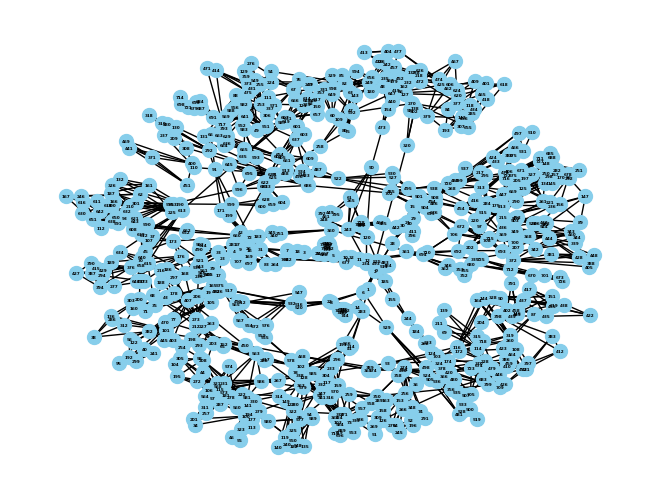

In [19]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=3, font_weight='bold')
plt.show()